In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import matplotlib.patches as mpatches
from scipy import stats

import re
import copy

In [1023]:
prStatusByCounry = pd.read_csv("StatusByCountry.csv")

In [1024]:
prStatusByCounry

,name,prostitutionStatus,pop2019
0,Afghanistan,Illegal,38041.754
1,Albania,Illegal,2880.917
2,Angola,Illegal,31825.295
3,Antigua and Barbuda,Illegal,97.118
4,Argentina,Legal,44780.677
...,...,...,...
95,United Arab Emirates,Illegal,9770.529
96,United Kingdom,Limitedly legal,67530.172
97,United States,Limitedly legal,329064.917
98,Uruguay,Legal,3461.734


In [1025]:
prNumberByCounry = pd.read_csv("ProstitutesNumber.csv")

In [1026]:
prNumberByCounry

,Country,Number of prostitutesSource: UNAIDS 2016Sex Workers: Size Estimates[4],Number of prostitutesOther sources and year,Population[5],"Prevalence(prostitutes per10,000 population)"
0,Afghanistan,"12,500",NaN,"34,656,032",4
1,Albania,NaN,"5,000 - 30,000 (2006)[6]","2,926,348",17 - 103
2,Algeria,NaN,No data,"40,606,052",-
3,Angola,"33,000",NaN,"28,813,463",12
4,Antigua and Barbuda,755,NaN,"100,963",75
...,...,...,...,...,...
172,Venezuela,NaN,"473,523 (2006)[13]","31,568,179",150
173,Vietnam,"72,000",NaN,"94,569,072",7
174,Yemen,"54,000",NaN,"27,584,213",20
175,Zambia,"9,300",NaN,"16,591,390",6


In [1027]:
counriesInfo = pd.read_excel("CountriesWorld.xls")

In [1028]:
counriesInfo

,Country,Region,GDP($ per capita),Literacy(%),Birthrate,Deathrate,Agriculture
0,Afghanistan,ASIA (EX. NEAR EAST),700.0,36.0,46.60,20.34,0.380
1,Albania,EASTERN EUROPE,4500.0,86.5,15.11,5.22,0.232
2,Algeria,NORTHERN AFRICA,6000.0,70.0,17.14,4.61,0.101
3,American Samoa,OCEANIA,8000.0,97.0,22.46,3.27,NaN
4,Andorra,WESTERN EUROPE,19000.0,100.0,8.71,6.25,NaN
...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,800.0,NaN,31.67,3.92,0.090
223,Western Sahara,NORTHERN AFRICA,NaN,NaN,NaN,NaN,NaN
224,Yemen,NEAR EAST,800.0,50.2,42.89,8.30,0.135
225,Zambia,SUB-SAHARAN AFRICA,800.0,80.6,41.00,19.93,0.220


In [1029]:
HPI = pd.read_excel("hpiData.xlsx")

In [1030]:
HPI

,country,hpi
0,Afghanistan,20.225350
1,Albania,36.766874
2,Algeria,33.300543
3,Argentina,35.190244
4,Armenia,25.666417
...,...,...
135,Venezuela,33.569960
136,Vietnam,40.307589
137,Yemen,22.754269
138,Zambia,25.224246


In [1031]:

## taking from table 'ProstitutesNumber' countries that are in table 'StatusByCountry' and
## adding their values of prostitutesPer10K column to the 2nd table
## formating table names


def makeInt(i):
    return int(i)

def takeSum(i):
    splitedList = i.split("-")
    intedList = list(map(makeInt, splitedList))
    return str(round(sum(intedList)/2))

prostitutesPer10K = []
for i in prStatusByCounry["name"]:
    prostitutesPer10K.append("")

for i in range(len(prNumberByCounry["Country"])):
    if prNumberByCounry["Country"][i] in list(prStatusByCounry["name"]):
        index = prStatusByCounry.loc[prStatusByCounry['name']== prNumberByCounry["Country"][i]].index[0]
        prostitutesPer10K[index] = prNumberByCounry["Prevalence(prostitutes per10,000 population)"][i]

for i in range(len(prostitutesPer10K)):
    if len(prostitutesPer10K[i]) > 3:
        prostitutesPer10K[i] = takeSum(prostitutesPer10K[i])
    if prostitutesPer10K[i] == '13+':
        prostitutesPer10K[i] = '13'
    if prostitutesPer10K[i] == '7.3':
        prostitutesPer10K[i] = '7' 
    if prostitutesPer10K[i] == '' or prostitutesPer10K[i] == '-':
        prostitutesPer10K[i] = 'None'    
        
prStatusByCounry["prostitutesPer10K"] = prostitutesPer10K
prStatusByCounry.rename(columns={'name': 'country', 'pop2019': 'population'}, inplace=True)

prStatusByCounry

,country,prostitutionStatus,population,prostitutesPer10K
0,Afghanistan,Illegal,38041.754,4
1,Albania,Illegal,2880.917,60
2,Angola,Illegal,31825.295,12
3,Antigua and Barbuda,Illegal,97.118,75
4,Argentina,Legal,44780.677,18
...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32
96,United Kingdom,Limitedly legal,67530.172,11
97,United States,Limitedly legal,329064.917,31
98,Uruguay,Legal,3461.734,24


In [1032]:
prostitutionStatus = ['Illegal', 'Illegal', 'Illegal', 'Illegal', 'Legality varies with local laws', 'Illegal', 
                      'Legality varies with local law', 'Legal', 'Illegal', 'Legal', 'Illegal', 'Abolitionism', 
                      'Neo-abolitionism', 'Legal', 'Abolitionism', 'Abolitionism', 'Illegal', 'Neo-abolitionism', 
                      'Legal', 'Illegal', 'Legal', 'Abolitionism', 'Illegal', 'Abolitionism', 
                      'Legality varies with local laws', 'Abolitionism', 'Abolitionism', 'Illegal', 'Abolitionism', 'Legal', 
                      'Illegal', 'Legality varies with local laws', 'Abolitionism', 'Abolitionism', 'Abolitionism', 'Neo-abolitionism', 
                      'Legal', 'Legal', 'Illegal', 'Abolitionism', 'Illegal', 'Illegal', 
                      'Abolitionism', 'Legal', 'Neo-abolitionism', 'Abolitionism', 'Legality varies with local laws', 'Illegal', 
                      'Illegal', 'Neo-abolitionism', 'Abolitionism', 'Abolitionism', 'Illegal', 'Illegal', 
                      'Illegal', 'Legality varies with local laws', 'Abolitionism', 'Legal', 'Illegal', 'Illegal', 
                      'Legal', 'Abolitionism', 'Abolitionism', 'Legality varies with local laws', 'Legal', 'Decriminalization', 
                      'Abolitionism', 'Illegal', 'Neo-abolitionism', 'Legal', 'Abolitionism', 'Legal', 
                      'Illegal', 'Abolitionism', 'Abolitionism', 'Illegal', 'Illegal', 'Illegal', 
                      'Illegal', 'Illegal', 'Illegal', 'Legal', 'Legality varies with local laws', 'Abolitionism', 
                      'Abolitionism', 'Illegal', 'Illegal', 'Abolitionism', 'Illegal', 'Neo-abolitionism', 
                      'Legal', 'Illegal', 'Illegal', 'Legal', 'Illegal', 'Illegal', 
                      'Abolitionism', 'Illegal', 'Legal', 'Legal']

prStatusByCounry["prostitutionStatus"] = prostitutionStatus

prStatusByCounry

,country,prostitutionStatus,population,prostitutesPer10K
0,Afghanistan,Illegal,38041.754,4
1,Albania,Illegal,2880.917,60
2,Angola,Illegal,31825.295,12
3,Antigua and Barbuda,Illegal,97.118,75
4,Argentina,Legality varies with local laws,44780.677,18
...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32
96,United Kingdom,Abolitionism,67530.172,11
97,United States,Illegal,329064.917,31
98,Uruguay,Legal,3461.734,24


In [1033]:
##Adding info from table countries world to the main table, adding some missed info to the table from internet
region = []
gdp = []
literacy = []
pplGrowth = []
agriculture = []
a = 0
for i in range(len(counriesInfo["Country"])):
    counriesInfo["Country"][i] = counriesInfo["Country"][i].strip()

temp = prStatusByCounry["country"]
for i in range(len(prStatusByCounry["country"])):
    temp[i] = temp[i].strip()
    
for i in range(len(counriesInfo["Country"])):
    if counriesInfo["Country"][i] in list(prStatusByCounry["country"]):
        a += 1
        region.append(counriesInfo["Region"][i])
        gdp.append(counriesInfo["GDP($ per capita)"][i])
        literacy.append(counriesInfo["Literacy(%)"][i])
        pplGrowth.append(str(int(counriesInfo["Birthrate"][i]) - int(counriesInfo["Deathrate"][i])))
        agriculture.append(counriesInfo["Agriculture"][i])
        
#South Korea index 87
#Antigua and Barbuda index 4
#Bahamas index 9
#Trinidad and Tobago index 93
#North Korea idex 68
#Saint Kitts and Nevis index 78

region.insert(87, "Asia")
gdp.insert(87, "31430")
literacy.insert(87, "None")
pplGrowth.insert(87, '2.57')
agriculture.insert(87, 'None')

region.insert(4, 'LATIN AMER. & CARIB')
gdp.insert(4, '18416')
literacy.insert(4, '99.0')
pplGrowth.insert(4, '10.66')
agriculture.insert(4, 'None')

region.insert(9, 'LATIN AMER. & CARIB')
gdp.insert(9, '34002')
literacy.insert(9, 'None')
pplGrowth.insert(9, '9.36')
agriculture.insert(9, 'None')

region.insert(93, 'LATIN AMER. & CARIB')
gdp.insert(93, '16243')
literacy.insert(93, '99.0')
pplGrowth.insert(93, '6.16')
agriculture.insert(93, 'None')

region.insert(68,'Asia' )
gdp.insert(68, '1000')
literacy.insert(68, "100.0")
pplGrowth.insert(68, '3.98')
agriculture.insert(68, 'None')

region.insert(78, 'LATIN AMER. & CARIB')
gdp.insert(78, '18714')
literacy.insert(78, 'None')
pplGrowth.insert(78, '7.12')
agriculture.insert(78, 'None')
       
prStatusByCounry["region"] = region
prStatusByCounry["gdp"] = gdp
prStatusByCounry["literacy"] = literacy
prStatusByCounry["pplGrowth"] = pplGrowth
prStatusByCounry["agriculture"] = agriculture



c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [1034]:
prStatusByCounry

,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture
0,Afghanistan,Illegal,38041.754,4,ASIA (EX. NEAR EAST),700,36,26,0.38
1,Albania,Illegal,2880.917,60,EASTERN EUROPE,4500,86.5,10,0.232
2,Angola,Illegal,31825.295,12,SUB-SAHARAN AFRICA,1900,42,21,0.096
3,Antigua and Barbuda,Illegal,97.118,75,LATIN AMER. & CARIB,11200,97.1,9,0.095
4,Argentina,Legality varies with local laws,44780.677,18,LATIN AMER. & CARIB,18416,99.0,10.66,None
...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32,LATIN AMER. & CARIB,16243,99.0,6.16,None
96,United Kingdom,Abolitionism,67530.172,11,WESTERN EUROPE,27700,99,0,0.005
97,United States,Illegal,329064.917,31,NORTHERN AMERICA,37800,97,6,0.01
98,Uruguay,Legal,3461.734,24,LATIN AMER. & CARIB,12800,98,4,0.093


In [1035]:
##adding HPI

a = 0
hpilist = []
for i in range(len(HPI["country"])):
    if HPI["country"][i] in list(prStatusByCounry["country"]):
        hpilist.append(HPI["hpi"][i])

#Angola 3
#Antigua and Barbuda 4
#Bahamas 9
#Barbados 11
#Cuba 24
#Dominica 28
#Grenada 39
#Guyana 41
#Jordan 55
#North Korea 68
#Saint Kitts and Nevis 78
#Saint Lucia 79
#Saint Vincent and the Grenadines 80
#Saudi Arabia 81
#Singapore 83
#United Arab Emirates 96
#United States 98
hpilist.insert(3, '27.88')
hpilist.insert(4, '59.23')
hpilist.insert(9, '44.90')
hpilist.insert(11, '52.73')
hpilist.insert(24, '61.86')
hpilist.insert(28, 'None')
hpilist.insert(39, '48.96')
hpilist.insert(41, '45.6')
hpilist.insert(55, '54.6')
hpilist.insert(68, 'None')
hpilist.insert(78, '56.14')
hpilist.insert(79, '61.31')
hpilist.insert(80, '61.37')
hpilist.insert(81, '59.7')
hpilist.insert(83, '48.2')
hpilist.insert(96, '28.2')
hpilist.insert(98, '30.7')

prStatusByCounry["hpi"] = hpilist

In [1036]:
prStatusByCounry

,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,Illegal,38041.754,4,ASIA (EX. NEAR EAST),700,36,26,0.38,20.2253
1,Albania,Illegal,2880.917,60,EASTERN EUROPE,4500,86.5,10,0.232,36.7669
2,Angola,Illegal,31825.295,12,SUB-SAHARAN AFRICA,1900,42,21,0.096,35.1902
3,Antigua and Barbuda,Illegal,97.118,75,LATIN AMER. & CARIB,11200,97.1,9,0.095,27.88
4,Argentina,Legality varies with local laws,44780.677,18,LATIN AMER. & CARIB,18416,99.0,10.66,None,59.23
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32,LATIN AMER. & CARIB,16243,99.0,6.16,None,31.9093
96,United Kingdom,Abolitionism,67530.172,11,WESTERN EUROPE,27700,99,0,0.005,28.2
97,United States,Illegal,329064.917,31,NORTHERN AMERICA,37800,97,6,0.01,36.1343
98,Uruguay,Legal,3461.734,24,LATIN AMER. & CARIB,12800,98,4,0.093,30.7


In [1037]:
newStatus = {'Illegal': '1', 
              'Legal': '2', 
              'Abolitionism': '3', 
              'Neo-abolitionism': '4', 
              'Decriminalization': '5',
              'Legality varies with local laws': '6',
              'Legality varies with local law': '6'}
for i in range(len(prStatusByCounry["region"])):
    prStatusByCounry["region"][i] = prStatusByCounry["region"][i].strip()

newRegion = {'ASIA (EX. NEAR EAST)': 'Asia', 
              'EASTERN EUROPE': 'Europe', 
              'SUB-SAHARAN AFRICA': 'Africa', 
              'LATIN AMER. & CARIB': 'SouthAmerica', 
              'C.W. OF IND. STATES': 'Asia',
              'OCEANIA': 'Australia', 
              'WESTERN EUROPE': 'Europe', 
              'NORTHERN AMERICA': 'NorthAmerica', 
              'NEAR EAST': 'Asia',
              'BALTICS': 'Europe',
            'NORTHERN AFRICA' : 'Africa',
            'Austria': 'Australia'}
prStatusByCounry = prStatusByCounry.replace({"prostitutionStatus": newStatus, "region": newRegion})
prStatusByCounry.head()

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,1,38041.754,4,Asia,700,36,26,0.38,20.2253
1,Albania,1,2880.917,60,Europe,4500,86.5,10,0.232,36.7669
2,Angola,1,31825.295,12,Africa,1900,42,21,0.096,35.1902
3,Antigua and Barbuda,1,97.118,75,SouthAmerica,11200,97.1,9,0.095,27.88
4,Argentina,6,44780.677,18,SouthAmerica,18416,99.0,10.66,None,59.23


In [251]:
export_csv = prStatusByCounry.to_csv (r'NotProcessedConnectedData.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

print (prStatusByCounry)

PermissionError: [Errno 13] Permission denied: 'NotProcessedConnectedData.csv'

In [1038]:
## Data Cleaning. Replacing missing values with mean value
## I will test way of replacing with mean. 
for i in range(len(prStatusByCounry.prostitutesPer10K)):
    if prStatusByCounry.prostitutesPer10K[i] != "None":
        prStatusByCounry.prostitutesPer10K[i] = int(prStatusByCounry.prostitutesPer10K[i])
    else:
        prStatusByCounry.prostitutesPer10K[i] = 0
        
for i in range(len(prStatusByCounry.literacy)):
    if prStatusByCounry.literacy[i] != "None":
        prStatusByCounry.literacy[i] = float(prStatusByCounry.literacy[i])
    else:
        prStatusByCounry.literacy[i] = 0
        
        
for i in range(len(prStatusByCounry.agriculture)):
    if prStatusByCounry.agriculture[i] != "None":
        prStatusByCounry.agriculture[i] = float(prStatusByCounry.agriculture[i])
    else:
        prStatusByCounry.agriculture[i] = 0
        
for i in range(len(prStatusByCounry.hpi)):
    if prStatusByCounry.hpi[i] != "None":
        prStatusByCounry.hpi[i] = float(prStatusByCounry.hpi[i])
    else:
        prStatusByCounry.hpi[i] = 0
        
        
prStatusByCounry.literacy[83] = 0

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [1039]:
uncleanedData = prStatusByCounry.copy()
meanReplaceData = prStatusByCounry.copy()
dropNonesData = prStatusByCounry.copy()

In [1040]:
prostitutesPer10K = float(meanReplaceData.prostitutesPer10K.mean())
literacy = float(meanReplaceData.literacy.mean())
agriculture = float(meanReplaceData.agriculture.mean())


In [1041]:
meanReplaceData = meanReplaceData.replace({"prostitutesPer10K": {0: prostitutesPer10K}})
meanReplaceData = meanReplaceData.replace({"literacy": {0: literacy}})
meanReplaceData = meanReplaceData.replace({"agriculture": {0: agriculture}})


In [1042]:
meanReplaceData

,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,1,38041.754,4.0,Asia,700,36.0,26,0.38000,20.2253
1,Albania,1,2880.917,60.0,Europe,4500,86.5,10,0.23200,36.7669
2,Angola,1,31825.295,12.0,Africa,1900,42.0,21,0.09600,35.1902
3,Antigua and Barbuda,1,97.118,75.0,SouthAmerica,11200,97.1,9,0.09500,27.88
4,Argentina,6,44780.677,18.0,SouthAmerica,18416,99.0,10.66,0.10218,59.23
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,1,9770.529,32.0,SouthAmerica,16243,99.0,6.16,0.10218,31.9093
96,United Kingdom,3,67530.172,11.0,Europe,27700,99.0,0,0.00500,28.2
97,United States,1,329064.917,31.0,NorthAmerica,37800,97.0,6,0.01000,36.1343
98,Uruguay,2,3461.734,24.0,SouthAmerica,12800,98.0,4,0.09300,30.7


In [1043]:
col_list = list(meanReplaceData)
col_list[1], col_list[4] = col_list[4], col_list[1]
meanReplaceData = meanReplaceData.ix[:,col_list]


col_list = list(meanReplaceData)
col_list[2], col_list[4] = col_list[4], col_list[2]
meanReplaceData = meanReplaceData.ix[:,col_list]

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc 

In [1044]:

for i in range(3, len(meanReplaceData.columns)):
    col = meanReplaceData.columns[i]
    print(col)
    for j in range(len(meanReplaceData[col])):
       
        meanReplaceData[col][j] = float(meanReplaceData[col][j])



prostitutesPer10K
population
gdp
literacy
pplGrowth
agriculture
hpi


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [1045]:
meanReplaceData

,country,region,prostitutionStatus,prostitutesPer10K,population,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,Asia,1,4.0,38041.754,700,36.0,26,0.38000,20.2253
1,Albania,Europe,1,60.0,2880.917,4500,86.5,10,0.23200,36.7669
2,Angola,Africa,1,12.0,31825.295,1900,42.0,21,0.09600,35.1902
3,Antigua and Barbuda,SouthAmerica,1,75.0,97.118,11200,97.1,9,0.09500,27.88
4,Argentina,SouthAmerica,6,18.0,44780.677,18416,99.0,10.66,0.10218,59.23
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,SouthAmerica,1,32.0,9770.529,16243,99.0,6.16,0.10218,31.9093
96,United Kingdom,Europe,3,11.0,67530.172,27700,99.0,0,0.00500,28.2
97,United States,NorthAmerica,1,31.0,329064.917,37800,97.0,6,0.01000,36.1343
98,Uruguay,SouthAmerica,2,24.0,3461.734,12800,98.0,4,0.09300,30.7


In [1046]:
# now we will perform normalization of data and test a few ways
# normalization scenario from lecture
normalizationFromLecture = meanReplaceData.copy()
for i in range(3, len(normalizationFromLecture.columns)):
    col = normalizationFromLecture.columns[i]
    print(col)
    max_val = normalizationFromLecture[col].max()
    min_val = normalizationFromLecture[col].min()
    normalizationFromLecture[col] = normalizationFromLecture[col].apply(lambda x: (x - min_val)/ (max_val - min_val))

prostitutesPer10K
population
gdp
literacy
pplGrowth
agriculture
hpi


In [1047]:

# min - max normalization same as hidgher but with library
MinMaxNormalization = meanReplaceData.copy()
from mlxtend.preprocessing import minmax_scaling
for i in range(3, len(MinMaxNormalization.columns)):
    a = []
    df = pd.DataFrame()
    col = MinMaxNormalization.columns[i]
    a.append(col)
    df[col] = MinMaxNormalization[col]

    MinMaxNormalization[col] = minmax_scaling(df, columns=a)


In [1048]:
# Z-Score normalozation
ZscoreNormalization =  meanReplaceData.copy()

for i in range(3, len(ZscoreNormalization.columns)):
    a = []
    df = pd.DataFrame()
    col = ZscoreNormalization.columns[i]
    a.append(col)
    df[col] = ZscoreNormalization[col]
    ZscoreNormalization[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [1049]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(ZscoreNormalization)

                             country        region prostitutionStatus  \
0                        Afghanistan          Asia                  1   
1                            Albania        Europe                  1   
2                             Angola        Africa                  1   
3                Antigua and Barbuda  SouthAmerica                  1   
4                          Argentina  SouthAmerica                  6   
5                            Armenia          Asia                  1   
6                          Australia     Australia                  6   
7                            Austria        Europe                  2   
8                            Bahamas          Asia                  1   
9                         Bangladesh  SouthAmerica                  2   
10                          Barbados  SouthAmerica                  1   
11                           Belgium        Europe                  3   
12                            Belize  SouthAmerica 

In [1050]:
##Decimal Scaling Normalization
DecimalScalingNormalization =  meanReplaceData.copy()

for i in range(3, len(DecimalScalingNormalization.columns)):
    df = pd.DataFrame()
    col = DecimalScalingNormalization.columns[i]
    df[col] = DecimalScalingNormalization[col]
    p = df[col].max()
    q = len(str(abs(p)))
    for j in range(len(df[col])):
        df[col][j] = df[col][j]/10**q 
    
    DecimalScalingNormalization[col] = df[col]

# for x in df:
#         p = df[x].max()
#         q = len(str(abs(p)))
#         df[x] = df[x]/10**q 

In [1051]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(DecimalScalingNormalization)

                             country        region prostitutionStatus  \
0                        Afghanistan          Asia                  1   
1                            Albania        Europe                  1   
2                             Angola        Africa                  1   
3                Antigua and Barbuda  SouthAmerica                  1   
4                          Argentina  SouthAmerica                  6   
5                            Armenia          Asia                  1   
6                          Australia     Australia                  6   
7                            Austria        Europe                  2   
8                            Bahamas          Asia                  1   
9                         Bangladesh  SouthAmerica                  2   
10                          Barbados  SouthAmerica                  1   
11                           Belgium        Europe                  3   
12                            Belize  SouthAmerica 

In [1052]:
## Predictions for uncleaned data

col_list = list(uncleanedData)
col_list[1], col_list[4] = col_list[4], col_list[1]
uncleanedData = uncleanedData.ix[:,col_list]


col_list = list(uncleanedData)
col_list[2], col_list[4] = col_list[4], col_list[2]
uncleanedData = uncleanedData.ix[:,col_list]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(uncleanedData)

                             country        region prostitutionStatus  \
0                        Afghanistan          Asia                  1   
1                            Albania        Europe                  1   
2                             Angola        Africa                  1   
3                Antigua and Barbuda  SouthAmerica                  1   
4                          Argentina  SouthAmerica                  6   
5                            Armenia          Asia                  1   
6                          Australia     Australia                  6   
7                            Austria        Europe                  2   
8                            Bahamas          Asia                  1   
9                         Bangladesh  SouthAmerica                  2   
10                          Barbados  SouthAmerica                  1   
11                           Belgium        Europe                  3   
12                            Belize  SouthAmerica 

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [1053]:
for i in range(3, len(uncleanedData.columns)):
    col = uncleanedData.columns[i]
    print(col)
    for j in range(len(uncleanedData[col])):
        uncleanedData[col][j] = float(uncleanedData[col][j])


prostitutesPer10K
population
gdp
literacy
pplGrowth
agriculture
hpi


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [641]:
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas_profiling

In [1054]:
#Illegal, Swedish model-  0
# Kind og legallity - 1

def changeProstitutionStatus(df):
    for i in range(len(df.prostitutionStatus)):
        if df.prostitutionStatus[i] == "1" or df.prostitutionStatus[i] == "4":
            df.prostitutionStatus[i] = 0
        else: df.prostitutionStatus[i] = 1
            
changeProstitutionStatus(uncleanedData)            

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1055]:
uncleanedData

,country,region,prostitutionStatus,prostitutesPer10K,population,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,Asia,0,4,38041.754,700,36,26,0.38,20.2253
1,Albania,Europe,0,60,2880.917,4500,86.5,10,0.232,36.7669
2,Angola,Africa,0,12,31825.295,1900,42,21,0.096,35.1902
3,Antigua and Barbuda,SouthAmerica,0,75,97.118,11200,97.1,9,0.095,27.88
4,Argentina,SouthAmerica,1,18,44780.677,18416,99,10.66,0,59.23
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,SouthAmerica,0,32,9770.529,16243,99,6.16,0,31.9093
96,United Kingdom,Europe,1,11,67530.172,27700,99,0,0.005,28.2
97,United States,NorthAmerica,0,31,329064.917,37800,97,6,0.01,36.1343
98,Uruguay,SouthAmerica,1,24,3461.734,12800,98,4,0.093,30.7


In [644]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(uncleanedData)

                             country        region prostitutionStatus  \
0                        Afghanistan          Asia                  0   
1                            Albania        Europe                  0   
2                             Angola        Africa                  0   
3                Antigua and Barbuda  SouthAmerica                  0   
4                          Argentina  SouthAmerica                  1   
5                            Armenia          Asia                  0   
6                          Australia     Australia                  1   
7                            Austria        Europe                  1   
8                            Bahamas          Asia                  0   
9                         Bangladesh  SouthAmerica                  1   
10                          Barbados  SouthAmerica                  0   
11                           Belgium        Europe                  1   
12                            Belize  SouthAmerica 

In [645]:
def LinearRegr(df1):
    df = df1.copy()

    X = df[['prostitutesPer10K', 'population', 'gdp',
                          'literacy', 'pplGrowth', 'agriculture',
                           'hpi']]

    Y = df[['prostitutionStatus']]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    print("Intercept: " + str(regressor.intercept_))
    print("Coefficients: " + str(regressor.coef_))
    y_pred = regressor.predict(X_test)
    from sklearn.metrics import accuracy_score
    df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
    print(df)
    df.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept: [0.45044895]
Coefficients: [[ 2.06802822e-03 -2.52119534e-08 -4.87997875e-06  1.02276570e-03
  -5.18613716e-03 -8.86507374e-01  6.58637332e-03]]
   Actual  Predicted
0       1   0.617612
1       0   0.870627
2       0   0.545910
3       1   0.672579
4       0   0.787230
5       1   0.256713
6       0   0.327732
7       1   0.644348
8       0   0.554295
9       0   0.716588
10      0   0.582340
11      0   0.463421
12      0   0.691954
13      1   0.544758
14      1   0.664338
15      0   0.427924
16      0   0.749750
17      1   0.805247
18      1   0.127228
19      0   0.614086


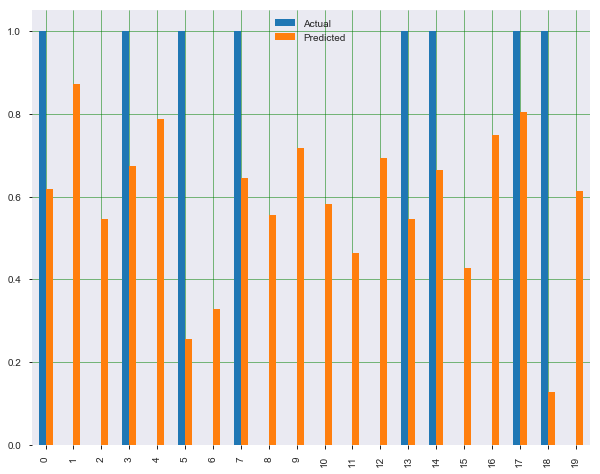

Mean Absolute Error: 0.5499518241411222
Mean Squared Error: 0.3405439959656125
Root Mean Squared Error: 0.5835614757380858


In [646]:
LinearRegr(uncleanedData)
# Accuracy is about 45%

In [1056]:
changeProstitutionStatus(normalizationFromLecture)
LinearRegr(normalizationFromLecture)


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1057]:

changeProstitutionStatus(MinMaxNormalization)
LinearRegr(MinMaxNormalization)

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1059]:
changeProstitutionStatus(ZscoreNormalization)
LinearRegr(ZscoreNormalization)


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1060]:

changeProstitutionStatus(DecimalScalingNormalization)
LinearRegr(DecimalScalingN.ormalization)

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,region,prostitutionStatus,prostitutesPer10K,population,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,Asia,0,0.00004,3.804175e-07,7e-05,0.000360,0.0026,3.800000e-06,0.000202253
1,Albania,Europe,0,0.00060,2.880917e-08,0.00045,0.000865,0.001,2.320000e-06,0.000367669
2,Angola,Africa,0,0.00012,3.182529e-07,0.00019,0.000420,0.0021,9.600000e-07,0.000351902
3,Antigua and Barbuda,SouthAmerica,0,0.00075,9.711800e-10,0.00112,0.000971,0.0009,9.500000e-07,0.0002788
4,Argentina,SouthAmerica,1,0.00018,4.478068e-07,0.0018416,0.000990,0.001066,1.021800e-06,0.0005923
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,SouthAmerica,0,0.00032,9.770529e-08,0.0016243,0.000990,0.000616,1.021800e-06,0.000319093
96,United Kingdom,Europe,1,0.00011,6.753017e-07,0.00277,0.000990,0,5.000000e-08,0.000282
97,United States,NorthAmerica,0,0.00031,3.290649e-06,0.00378,0.000970,0.0006,1.000000e-07,0.000361343
98,Uruguay,SouthAmerica,1,0.00024,3.461734e-08,0.00128,0.000980,0.0004,9.300000e-07,0.000307


In [651]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [749]:
#KNN
def XYsplit(df1):
    X = []
    Y = []
    df = df1.copy()
    
    for i in range(df.shape[0]):
        X.append(list(df.iloc[i])[3:])
        Y.append(list(df.iloc[i])[2])

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
    
    return(X_train, X_test, y_train, y_test)

def KNN(X_train, X_test, y_train, y_test, k):
    

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100 , "%")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    error = []
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')

In [750]:
X_train, X_test, y_train, y_test = XYsplit(ZscoreNormalization)


# list(DecimalScalingNormalization.iloc[0])
# DecimalScalingNormalization.shape[0]

Accuracy: 75.0 %
[[7 4]
 [1 8]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.67      0.89      0.76         9

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



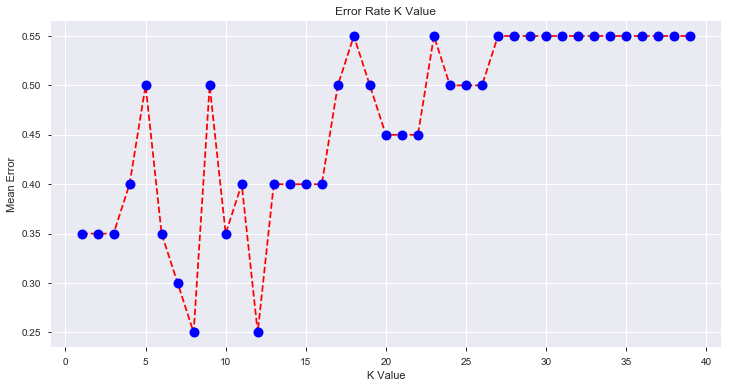

In [758]:
KNN(X_train, X_test, y_train, y_test, 8)

In [772]:
X_train, X_test, y_train, y_test = XYsplit(uncleanedData)


Accuracy: 85.0 %
[[ 6  3]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.79      1.00      0.88        11

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



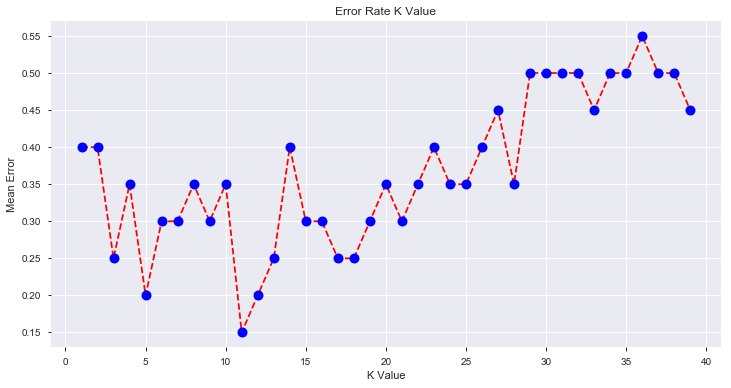

In [774]:
KNN(X_train, X_test, y_train, y_test,11)

In [762]:
X_train, X_test, y_train, y_test = XYsplit(DecimalScalingNormalization)


Accuracy: 75.0 %
[[ 4  5]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.69      1.00      0.81        11

    accuracy                           0.75        20
   macro avg       0.84      0.72      0.72        20
weighted avg       0.83      0.75      0.73        20



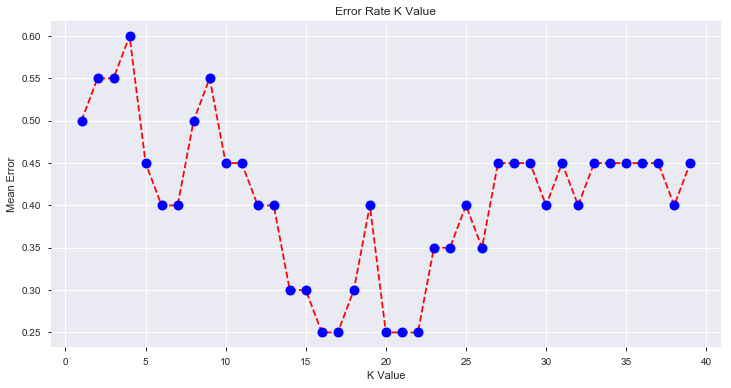

In [767]:

KNN(X_train, X_test, y_train, y_test, 21)

In [783]:
X_train, X_test, y_train, y_test = XYsplit(MinMaxNormalization)


Accuracy: 70.0 %
[[ 2  6]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.67      1.00      0.80        12

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



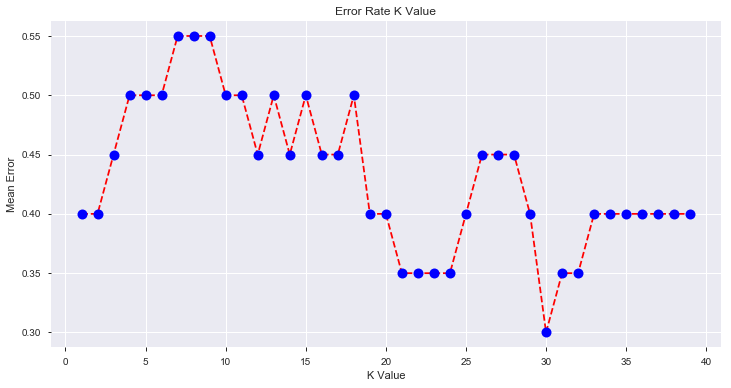

In [785]:
KNN(X_train, X_test, y_train, y_test, 30)

In [980]:
#RANK Transformation 
MinMaxNormalization.country.rank()

0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
      ...  
95     96.0
96     97.0
97     98.0
98     99.0
99    100.0
Name: country, Length: 100, dtype: float64

In [1083]:
for i in range(3, len(MinMaxNormalization.columns)):
    col = MinMaxNormalization.columns[i]
    MinMaxNormalization[col] =  MinMaxNormalization[col].rank()
MinMaxNormalization

,country,region,prostitutionStatus,prostitutesPer10K,population,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,Asia,0,7.5,74.0,1.5,1.0,97.5,97.0,10.0
1,Albania,Europe,0,88.0,21.0,30.0,30.5,53.5,90.0,78.0
2,Angola,Africa,0,31.0,68.0,13.0,4.0,85.5,58.0,72.0
3,Antigua and Barbuda,SouthAmerica,0,92.5,3.0,58.0,61.0,49.5,57.0,38.0
4,Argentina,SouthAmerica,1,44.0,77.0,70.0,81.5,56.0,66.0,96.0
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,SouthAmerica,0,81.5,46.0,67.0,81.5,44.0,66.0,62.0
96,United Kingdom,Europe,1,27.5,85.0,85.0,81.5,17.5,1.0,41.0
97,United States,NorthAmerica,0,79.5,98.0,98.5,58.5,42.0,4.0,77.0
98,Uruguay,SouthAmerica,1,71.0,24.0,62.0,68.0,35.5,55.5,56.0


In [1019]:
X_train, X_test, y_train, y_test = XYsplit(ZscoreNormalization)

Accuracy: 75.0 %
[[ 3  4]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.75      0.92      0.83        13

    accuracy                           0.75        20
   macro avg       0.75      0.68      0.69        20
weighted avg       0.75      0.75      0.73        20



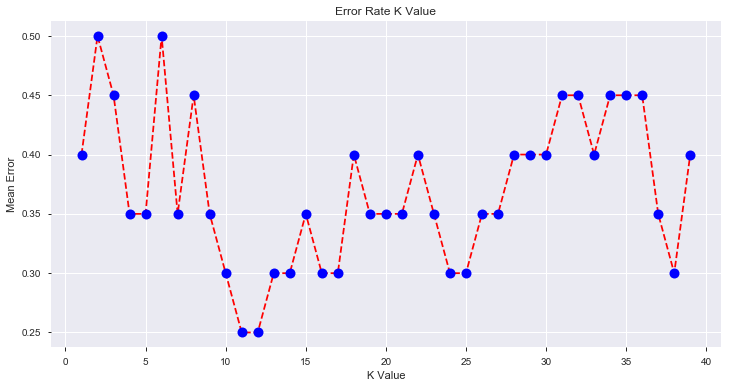

In [1021]:
KNN(X_train, X_test, y_train, y_test, 11)

Intercept: [0.51257823]
Coefficients: [[ 0.00034968  0.00307598 -0.0028768   0.00202463 -0.00333169 -0.00154026
   0.00376237]]
   Actual  Predicted
0       1   0.699528
1       0   0.672694
2       0   0.599982
3       1   0.740477
4       0   0.788029
5       1   0.447344
6       0   0.403964
7       1   0.785918
8       0   0.456776
9       0   0.639849
10      0   0.828557
11      0   0.215408
12      0   0.491363
13      1   0.427416
14      1   0.697529
15      0   0.427837
16      0   0.700284
17      1   0.706468
18      1   0.479674
19      0   0.441471


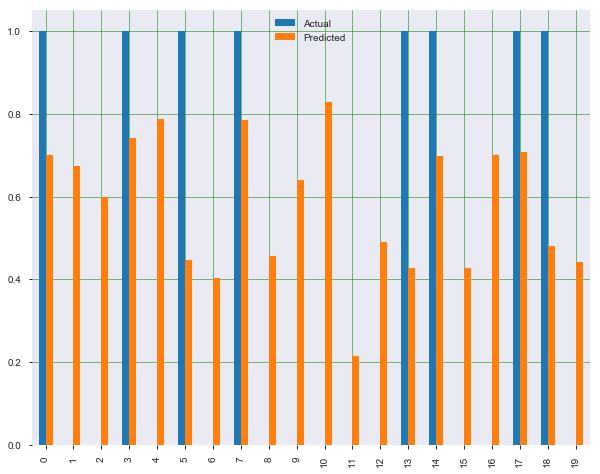

Mean Absolute Error: 0.4840930287319088
Mean Squared Error: 0.2671272182336163
Root Mean Squared Error: 0.5168435142609572


In [1017]:
LinearRegr(ZscoreNormalization)

In [1002]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [827]:
def XYsplitBOXCOX(df1):
    X = []
    Y = []
    df = df1.copy()
    
    for i in range(df.shape[0]):
        X.append(list(df.iloc[i])[3:])
        Y.append(list(df.iloc[i])[2])

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
    
#     return(X_train, X_test, y_train, y_test)

   
    # transform training data & save lambda value
    X_train_data, X_fitted_lambda = stats.boxcox(X_train)

    # use lambda value to transform test data
    X_test_data = stats.boxcox(X_test, X_fitted_lambda)
    # transform training data & save lambda value
    Y_train_data, Y_fitted_lambda = stats.boxcox(y_train)

    # use lambda value to transform test data
    Y_test_data = stats.boxcox(y_test, Y_fitted_lambda)
    # (optional) plot train & test
    fig, ax=plt.subplots(1,2)
    sns.distplot(X_train_data, ax=ax[0])
    sns.distplot(X_test_data, ax=ax[1])

In [830]:
XYsplitBOXCOX(MinMaxNormalization)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1062]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def LDA(df11):
    df = df11.copy()

    X = df[['prostitutesPer10K', 'population', 'gdp',
                          'literacy', 'pplGrowth', 'agriculture',
                           'hpi']]

    Y = df.prostitutionStatus
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
    
    y_train = y_train.astype('int')
    X_train = X_train.astype('int')
    y_test = y_test.astype('int')
    X_test = X_test.astype('int')
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
    print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
   
    classifier = RandomForestClassifier(max_depth=2, random_state=0)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print('Accuracy' + str(accuracy_score(y_test, y_pred)))
    
    

In [1097]:
# print("normalizationFromLecture", LDA(normalizationFromLecture))
print("MinMaxNormalization   ", LDA(MinMaxNormalization))

# print("ZscoreNormalization   ", LDA(ZscoreNormalization))
# print("DecimalScalingNormalization", LDA(DecimalScalingNormalization))

Accuracy of LDA classifier on training set: 0.68
Accuracy of LDA classifier on test set: 0.40
[[ 1 10]
 [ 1  8]]
Accuracy0.45
MinMaxNormalization    None


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [948]:
def PCA(df11, k):
    
    df = df11.copy()

    X = df[['prostitutesPer10K', 'population', 'gdp',
                          'literacy', 'pplGrowth', 'agriculture',
                           'hpi']]

    Y = df.prostitutionStatus
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
    
    y_train = y_train.astype('int')
    X_train = X_train.astype('int')
    y_test = y_test.astype('int')
    X_test = X_test.astype('int')
    
    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    from sklearn.decomposition import PCA

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    pca = PCA(n_components=k)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    from sklearn.ensemble import RandomForestClassifier

    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print('Accuracy' + str(accuracy_score(y_test, y_pred)))

In [1122]:
# PCA(uncleanedData, 7)

print("normalizationFromLecture",PCA(normalizationFromLecture, 7))



[0.24954494 0.17015967 0.16877637 0.16877637 0.15797572 0.08476693
 0.        ]
[[ 0  8]
 [ 2 10]]
Accuracy0.5
normalizationFromLecture None


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1171]:
print("MinMaxNormalization   ", PCA(MinMaxNormalization, 7))


[0.43574895 0.18501489 0.16204613 0.10015973 0.05429565 0.0366148
 0.02611983]
[[3 4]
 [6 7]]
Accuracy0.5
MinMaxNormalization    None


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1169]:
print("ZscoreNormalization   ", PCA(ZscoreNormalization, 7))


[0.29872889 0.17420067 0.14913588 0.12988468 0.09741811 0.09078255
 0.05984923]
[[5 5]
 [2 8]]
Accuracy0.65
ZscoreNormalization    None


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1172]:
print("DecimalScalingNormalization", PCA(DecimalScalingNormalization, 7))

[nan nan nan nan nan nan nan]
[[ 0 10]
 [ 0 10]]
Accuracy0.5
DecimalScalingNormalization None


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\decomposition\pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\decomposition\pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [969]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

data_input = uncleanedData[uncleanedData.columns[3:]]

#Reachdist function
def reachdist(distance_df, observation, index):
    return distance_df[observation][index]
  
 #LOF algorithm implementation from scratch
def LOF_algorithm(data_input, distance_metric = "cityblock", p = 5):
    distances = pdist(data_input.values, metric=distance_metric)
    dist_matrix = squareform(distances)
    distance_df = pd.DataFrame(dist_matrix)
    
    k = 2 if distance_metric == "cityblock" else 3 
    observations = distance_df.columns
    lrd_dict = {}
    n_dist_index = {}
    reach_array_dict = {}
    
    for observation in observations:
        dist = distance_df[observation].nsmallest(k+1).iloc[k]
        indexes = distance_df[distance_df[observation] <= dist].drop(observation).index
        n_dist_index[observation] = indexes
    
        reach_dist_array = []
        for index in indexes:
            #make a function reachdist(observation, index)
            dist_between_observation_and_index = reachdist(distance_df, observation, index)
            dist_index =  distance_df[index].nsmallest(k+1).iloc[k]
            reach_dist = max(dist_index, dist_between_observation_and_index)
            reach_dist_array.append(reach_dist)
        lrd_observation = len(indexes)/sum(reach_dist_array)
        reach_array_dict[observation] = reach_dist_array
        lrd_dict[observation] = lrd_observation
        
    #Calculate LOF
    LOF_dict = {}
    for observation in observations:
        lrd_array = []
        for index in n_dist_index[observation]:
            lrd_array.append(lrd_dict[index])
        LOF = sum(lrd_array)*sum(reach_array_dict[observation])/np.square(len(n_dist_index[observation]))
        LOF_dict[observation] = LOF

    return sorted(LOF_dict.items(), key=lambda x: x[1], reverse=True)[:p]
  
  




In [976]:
LOF_algorithm(data_input, p = 2, distance_metric = "cityblock")


[(92, 5.555616317878051), (19, 5.078803908068303)]

In [975]:
LOF_algorithm(data_input, p = 2, distance_metric = 'euclidean')


[(19, 6.247586334991575), (45, 6.116001790452838)]

In [978]:
data_input = MinMaxNormalization[MinMaxNormalization.columns[3:]]
LOF_algorithm(data_input, p = 2, distance_metric = 'euclidean')


[(85, 1.6381078973445151), (4, 1.4954086143130145)]

In [979]:
LOF_algorithm(data_input, p = 2, distance_metric = "cityblock")


[(85, 2.036270665536244), (97, 1.802663037216269)]